In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html

In [5]:
html = browser.html
soup = bs(html, "html.parser")

In [6]:
results = soup.find('table', class_='table')

In [7]:
for target in results:
    print(target)



<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>74

In [8]:
allHeaders = soup.find_all('th')
info = soup.find_all('tr', class_='data-row')

In [9]:
table_headers = []
id = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []

In [10]:
for header in allHeaders:
    table_headers.append(header.text)

# getting all data
for i in info:
   # adds id to end of list
    mars_id = i.find('td')
    id.append(int(mars_id.text))
    
    # adds terrestial dates to end of list
    terrestrial_date.append(mars_id.find_next_sibling('td').text)
    mars_id = mars_id.find_next_sibling('td')
    
    # adds sol to end of list
    sol.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # adds ls to end of list
    ls.append(int(mars_id.find_next_sibling("td").text))
    mars_id=mars_id.find_next_sibling('td')
    
    # adds month to end of list
    month.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # adds min temp to end of list
    min_temp.append(float(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # adds pressure to end of list
    pressure.append(float(mars_id.find_next_sibling("td").text))

In [11]:
mars_df = pd.DataFrame(columns = table_headers)
mars_df["id"] = id
mars_df["terrestrial_date"] = terrestrial_date
mars_df["sol"] = sol
mars_df["ls"] = ls
mars_df["month"] = month
mars_df["min_temp"] = min_temp
mars_df["pressure"] = pressure
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
datatypes = mars_df.dtypes
print(datatypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [13]:
# changes data type to suitable format
mars_df = mars_df.astype({'terrestrial_date':'datetime64'})

In [14]:
datatypes = mars_df.dtypes
print(datatypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [15]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


How many months exist on Mars?

In [17]:
maxMonth = mars_df["month"].max()
print(f'There are {maxMonth} months on Mars.')

There are 12 months on Mars.


How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [18]:
dataDays = mars_df["sol"].max() - mars_df["sol"].min() + 1
print(f'There are exactly {dataDays} Martian days of data in this dataset.')

There are exactly 1968 Martian days of data in this dataset.


What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

From the bar chart the 3rd month is the coldest and the 8th month is the warmest.


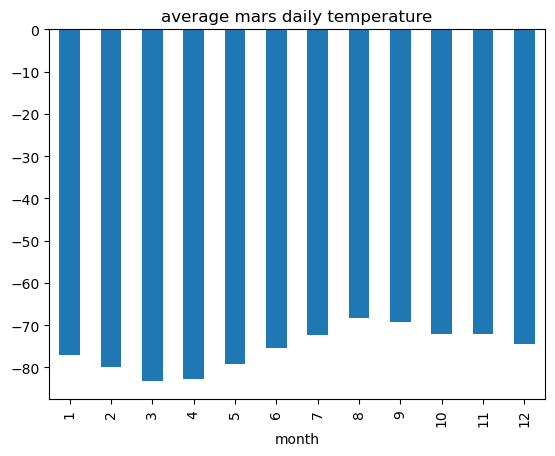

In [22]:
# returns the average temp of all the mars months
averageTemp = mars_df.groupby(['month'])['min_temp'].mean()

# results are put into a bar chart
averageTemp.plot.bar(x='Month on Mars', y='Average Minimum Temperature', title='average mars daily temperature');
print(f'From the bar chart the 3rd month is the coldest and the 8th month is the warmest.')


Which months have the lowest and the highest atmospheric pressure on Mars?

From the bar chart the 6th month is the lowest and the 9th month is the highest in terms of atmospheric pressure.


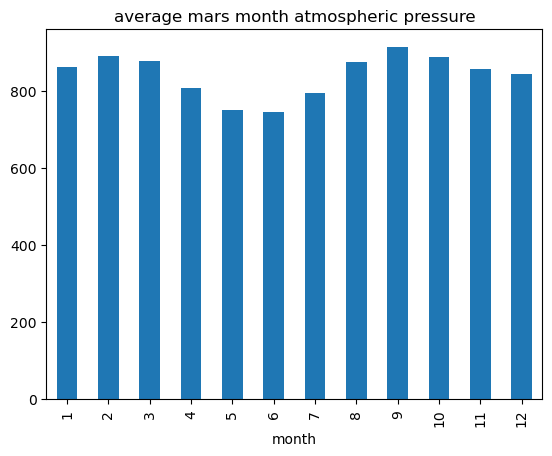

In [24]:
# returns average atmospheric pressure of mars months
averagePressure = mars_df.groupby(["month"])["pressure"].mean()
print(f'From the bar chart the 6th month is the lowest and the 9th month is the highest in terms of atmospheric pressure.')

# outputs the results into a bar chart
averagePressure.plot.bar(x='Mars month', y='Average Pressure', title='average mars month atmospheric pressure');

About how many terrestrial (Earth) days exist in a Martian year

The data is over 2021 Earth days and from the chart below there are 2.5 years worth of Martian data
Due to the previous data there are about 808.4 Earth days in a Martian year


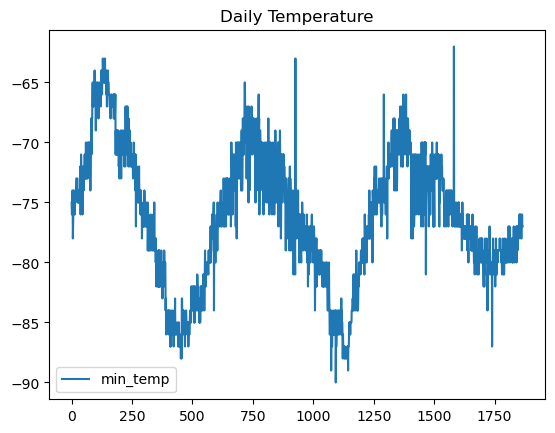

In [26]:
earthStartDate = mars_df['terrestrial_date'].min()
earthEndDate = mars_df['terrestrial_date'].max()
earthDays = (earthEndDate - earthStartDate).days
minTemp = mars_df[['min_temp']]
print(f'The data is over {earthDays} Earth days and from the chart below there are 2.5 years worth of Martian data')
martianYears = 2.5
earthDaysInMartianYear = earthDays/2.5
print(f'Due to the previous data there are about {earthDaysInMartianYear} Earth days in a Martian year')
minTemp.plot(title='Daily Temperature');

Export the DataFrame to a CSV file.

In [29]:
outputToCsv = 'outputData/marsData.csv'

mars_df.to_csv(outputToCsv,header=True,index=False)